In [46]:
import pandas as pd 
import numpy as np
from rdkit import Chem
from rdkit.Chem import PandasTools
#!pip install matplotlib
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from rdkit.Chem import AllChem 
import pickle

# Getting the data 

In [32]:
df = pd.read_csv('data/jak2.csv')
PandasTools.AddMoleculeColumnToFrame(df,'smiles','Molecule',includeFingerprints=True)

,smiles,value,label,Molecule
0,NC(=O)c1cn(nc1Nc2ccnc(F)c2)C3(CC#N)CCN(Cc4cccn...,6.84,0,
1,CN(C1CCC(CC#N)(CC1)n2cc(C(=O)N)c(Nc3ccnc(F)c3)...,6.98,0,
2,NC(=O)c1cn(nc1Nc2ccc(F)cc2)C3(CC#N)CCN(CC3)C(=...,7.48,0,
3,NC(=O)c1cn(nc1Nc2ccnc(F)c2)C3(CC#N)CCN(CC3)C(=...,8.05,1,
4,NC(=O)c1cn(nc1Nc2ccnc(F)c2)C3(CC#N)CCC(CC3)NCc...,8.70,1,
...,...,...,...,...
662,Cc1c[nH]c(CN2CCC(CC#N)(CC2)n3cc(C(=O)N)c(Nc4cc...,5.93,0,
663,NC(=O)c1cn(nc1Nc2ccnc(F)c2)C3(CC#N)CCN(Cc4cn5c...,NaN,0,
664,CC(C)(C)OC(=O)N1CCC(CC#N)(CC1)n2cc(C(=O)N)c(Nc...,7.96,0,
665,NC(=O)c1cn(nc1Nc2ccc(cc2)S(=O)(=O)C(F)F)C3(CC#...,9.00,1,

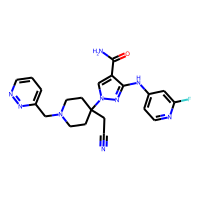
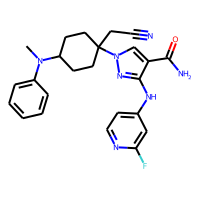
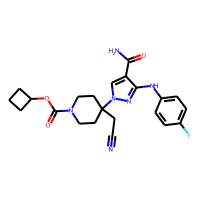
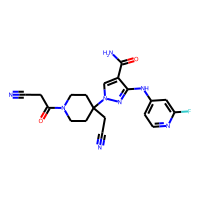
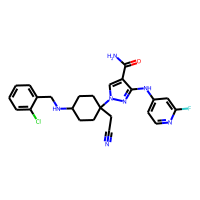
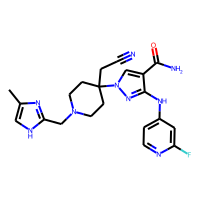
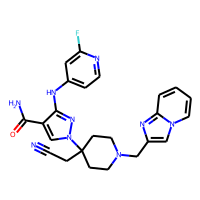
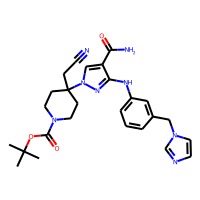
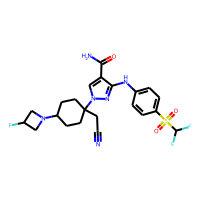
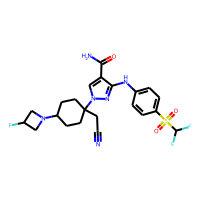

In [13]:
df

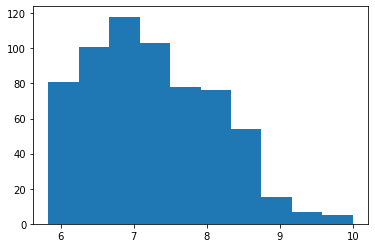

In [15]:
plt.hist(df.value)
plt.show()

# Building a predictive model 

In [43]:
X = [AllChem.GetMorganFingerprintAsBitVect(x, useChirality=False, radius=2) for x in df.Molecule]
y = np.array(df.label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

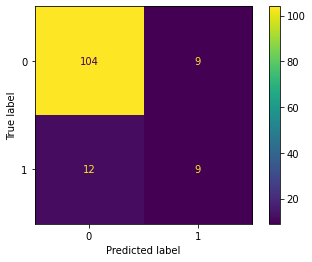

In [44]:
plot_confusion_matrix(classifier, X_test, y_test)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       113
           1       0.50      0.43      0.46        21

    accuracy                           0.84       134
   macro avg       0.70      0.67      0.68       134
weighted avg       0.83      0.84      0.84       134



In [48]:
pickle.dump(classifier, open('data/activity_model_jak2.pkl', 'wb'))